---

# Cats or Dog?!

<img src="http://www.evanmarie.com/content/files/notebook_images/cat_or_dog_banner.png" width=800>



In [ ]:
#@title ➢ Importing all the lovelies
%%capture
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
!pip install nbdev
from fastbook import *
from fastai.vision.widgets import *
import nbdev
from fastai.vision import *
from pathlib import Path
import PIL

# Did not end up using these, but could be useful sometime
# !pip install -q jmd_imagescraper
# from jmd_imagescraper.core import * 
# from jmd_imagescraper.imagecleaner import *

### ➢ Downloading the images from the [fast.ai](http://www.fast.ai) collection

In [ ]:
path = untar_data(URLs.PETS)/'images'

### ➢ Function for labeling the images
This is essentially an "Is this a cat or not?" app. This function checks to see if the label on the training image is a cat label. All of the cat labels are upper case, and that is how they are differentiated.

In [ ]:
def is_cat(x): return x[0].isupper()

### ➢ Creating the fast.ai dataloaders to feed to the model

In [ ]:
dls_pets = ImageDataLoaders.from_name_func(".",
                                           get_image_files(path), 
                                           valid_pct=0.2, seed=42,
                                           label_func=is_cat,
                                           item_tfms=Resize(192))

### ➢ **`show_batch()`** 
allows us to take a look at a sampling of the training data. Here, you can see how the images that are cats are labled "True", and the dogs are "False".


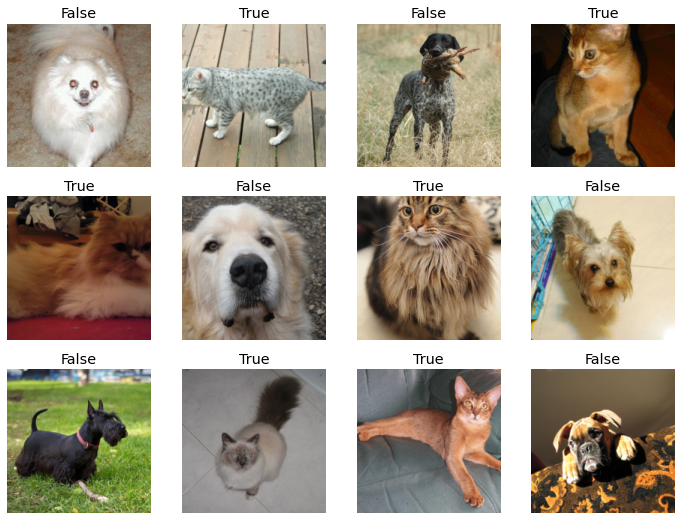

In [ ]:
  dls_pets.valid.show_batch(max_n=12, nrows=3)

### ➢ Defining the model
I am using transfer learning, meaning that I am importing a pretrained model, Resnet 18, which has been trained extensively on image recognition. I am then stripping off the last layer of that model and training for additional epochs on my own data. This is an incredibly fast and efficient way to acquire high-accuracy models.

In [ ]:
learn_pets = vision_learner(dls_pets, resnet18, metrics=accuracy)
learn_pets.fine_tune(5)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

### Clearning out the unuseful images

`ImageClassifierCleaner()` organizes the images by highest loss so that we can clean out the ones that are mislabeled. Here, you can go and check that the images in the training and in the validation set are all correctly categorized, change ones that are miscategorized, and delete ones that are just plain wrong.

In [ ]:
cleaner = ImageClassifierCleaner(learn_pets)
cleaner

### ➢ Removing the unwanted
These next two lines of code will remove any images that were marked for deletion in the **`cleaner`**.

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

### ➢ Exporting the model
This is the fast.ai syntax for exporting the newly trained model for use in the app.

In [ ]:
learn_pets.export('learn_pets.pk1')

### ➢ Confusion matrix
Here we can see where the model though that cats were dogs and dogs were cats. 

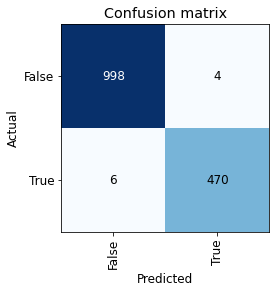

In [ ]:
interp = ClassificationInterpretation.from_learner(learn_pets)
interp.plot_confusion_matrix()

### **`plot_top_losses()`**
This function shows use images in an order of highest loss to lowest. We can see the prediction, the actual label, the loss, and the level of confidence the model had that it was correct. 

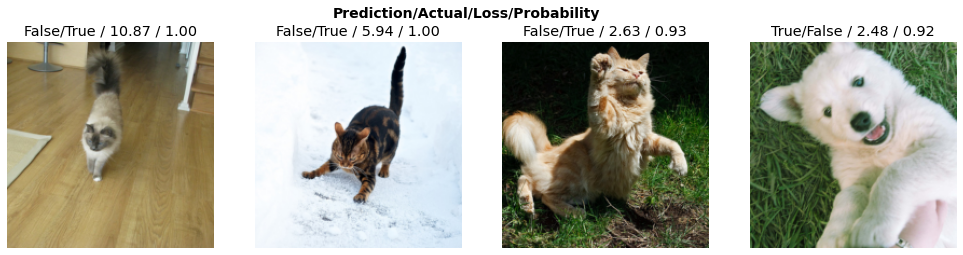

In [ ]:
interp.plot_top_losses(4, nrows=1, figsize=(17,4))

### ➢ Prediction
Here are a few predictions by the model.

True


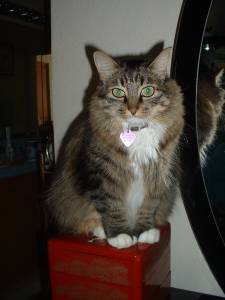

In [ ]:
pet_01 = get_image_files(path)[23]
print(learn_pets.predict(pet_01)[0])
img = PIL.Image.open(pet_01)
img

True


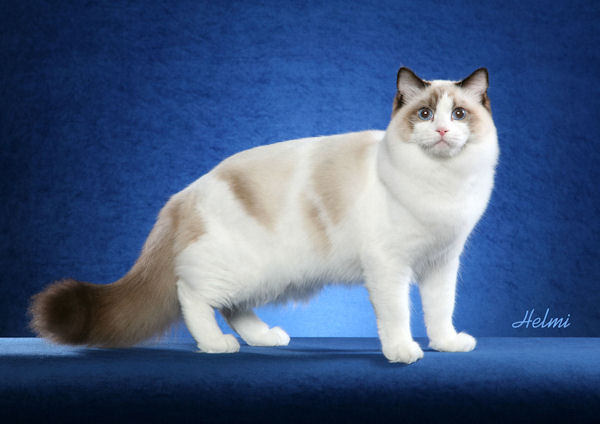

In [ ]:
pet_02 = get_image_files(path)[44]
print(learn_pets.predict(pet_02)[0])
img = PIL.Image.open(pet_02)
img

False


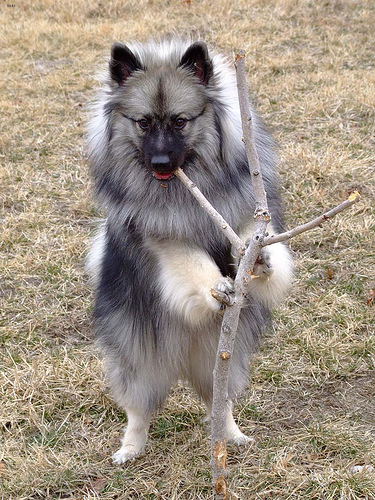

In [ ]:
pet_03 = get_image_files(path)[333]
print(learn_pets.predict(pet_03)[0])
img = PIL.Image.open(pet_03)
img

True


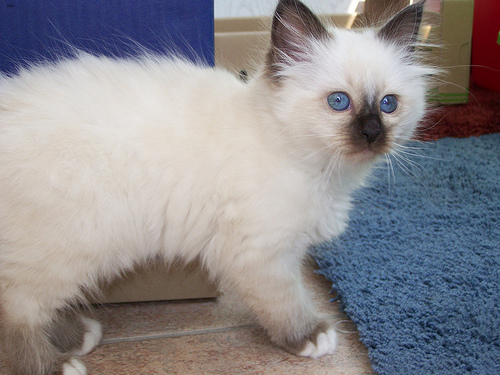

In [ ]:
pet_04 = get_image_files(path)[777]
print(learn_pets.predict(pet_04)[0])
img = PIL.Image.open(pet_04)
img

False


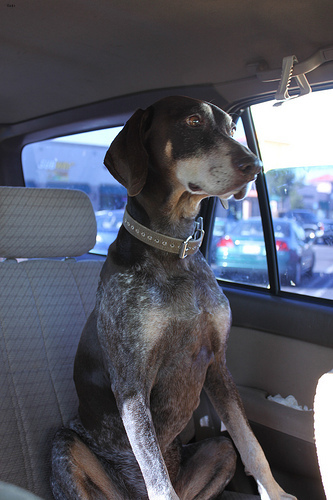

In [ ]:
pet_05 = get_image_files(path)[888]
print(learn_pets.predict(pet_05)[0])
img = PIL.Image.open(pet_05)
img